# Sprawozdanie z laboratorium fizycznego 

## Ćwiczenie nr E13

Badanie elektrycznego obwodu rezonansowego RLC

### Cel ćwiczenia

Celem ćwiczenia jest zbadanie zjawiska rezonansu napięć w szeregowym obwodzie RLC,  
wyznaczenie dobroci obwodu oraz wartości indukcyjności i rezystancji jego elementów.

### Opis badanego zjawiska

Obwód rezonansowy RLC składa się z rezystora (R), cewki (L) i kondensatora (C) i charakteryzuje się zdolnością  
do reagowania na określoną częstotliwość prądu zmiennego.

### Wzory i zależności

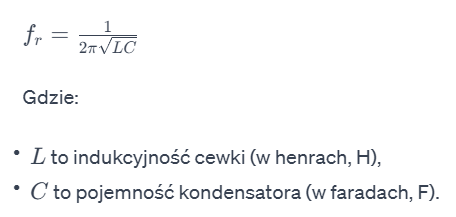

### Schemat układu pomiarowego

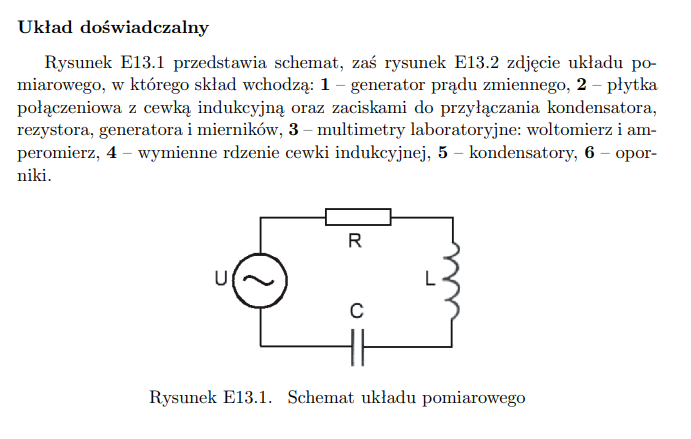